In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [34]:
file_name="Resources/clean_2019.csv"
clean_2019=pd.read_csv(file_name)
# clean_2019.drop("Unnamed:0")
clean_2019.head()

,Unnamed: 0,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,happy
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,happy
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,happy
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,happy
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,happy


In [35]:
clean_2019.drop(["Unnamed: 0"], axis=1)

,overall_rank,country,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,happy
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,happy
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,happy
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,happy
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,happy
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,not_happy
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,not_happy
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,not_happy
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,not_happy


In [36]:
happy=clean_2019.drop(["country"], axis=1)

In [37]:
happy = pd.get_dummies(happy)
happy.head()

,Unnamed: 0,overall_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy_happy,happy_nothappy_not_happy
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1,0
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1,0
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1,0
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1,0
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1,0


In [38]:
happy = happy.drop(columns=['happy_nothappy_not_happy'])
happy.head()

,Unnamed: 0,overall_rank,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_choice,generosity,perceptions_of_corruption,happy_nothappy_happy
0,0,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,1
1,1,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,1
2,2,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,1
3,3,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,1
4,4,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,1


In [39]:
X = happy[['gdp_per_capita',"generosity"]]
y = happy["happy_nothappy_happy"]
print(X.shape, y.shape)

(156, 2) (156,)


In [40]:
happy_array = happy[["gdp_per_capita", "generosity"]].to_numpy() 
print (happy_array)

[[1.34  0.153]
 [1.383 0.252]
 [1.488 0.271]
 [1.38  0.354]
 [1.396 0.322]
 [1.452 0.263]
 [1.387 0.267]
 [1.303 0.33 ]
 [1.365 0.285]
 [1.376 0.244]
 [1.372 0.332]
 [1.034 0.144]
 [1.276 0.261]
 [1.609 0.194]
 [1.333 0.348]
 [1.499 0.298]
 [1.373 0.261]
 [1.356 0.16 ]
 [1.433 0.28 ]
 [1.269 0.046]
 [1.503 0.262]
 [1.3   0.375]
 [1.07  0.074]
 [1.324 0.111]
 [1.368 0.242]
 [1.159 0.187]
 [0.8   0.175]
 [1.403 0.08 ]
 [1.684 0.22 ]
 [1.286 0.153]
 [1.149 0.109]
 [1.004 0.099]
 [1.124 0.127]
 [1.572 0.271]
 [0.794 0.093]
 [1.294 0.158]
 [1.362 0.255]
 [1.246 0.121]
 [1.231 0.185]
 [1.206 0.117]
 [0.745 0.322]
 [1.238 0.043]
 [0.985 0.099]
 [1.258 0.144]
 [0.694 0.2  ]
 [0.882 0.262]
 [1.092 0.066]
 [1.162 0.083]
 [1.263 0.19 ]
 [0.912 0.126]
 [1.5   0.142]
 [1.05  0.359]
 [1.187 0.075]
 [1.301 0.175]
 [1.237 0.103]
 [0.831 0.107]
 [1.12  0.215]
 [1.327 0.069]
 [0.642 0.246]
 [1.173 0.146]
 [0.776 0.137]
 [1.201 0.081]
 [0.855 0.184]
 [1.263 0.191]
 [0.96  0.083]
 [1.221 0.047]
 [0.677 0.

In [41]:
X = happy_array
y = happy["happy_nothappy_happy"].values.reshape(-1, 1)
print(X.shape, y.shape)

(156, 2) (156, 1)


In [42]:
print(f"Labels:{y[:156]}")
print(f"{X[:156]}")

Labels:[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]
[[1.34  0.153]
 [1.383 0.252]
 [1.488 0.271]
 [1.38  0.354]
 [1.396 0.322]
 [1.452 0.263]
 [1.387 0.267]
 [1.303 0.33 ]
 [1.365 0.285]
 [1.376 0.244]
 [1.372 0.332]
 [1.034 0.144]
 [1.276 0.261]
 [1.609 0.194]
 [

In [43]:
X

array([[1.34 , 0.153],
       [1.383, 0.252],
       [1.488, 0.271],
       [1.38 , 0.354],
       [1.396, 0.322],
       [1.452, 0.263],
       [1.387, 0.267],
       [1.303, 0.33 ],
       [1.365, 0.285],
       [1.376, 0.244],
       [1.372, 0.332],
       [1.034, 0.144],
       [1.276, 0.261],
       [1.609, 0.194],
       [1.333, 0.348],
       [1.499, 0.298],
       [1.373, 0.261],
       [1.356, 0.16 ],
       [1.433, 0.28 ],
       [1.269, 0.046],
       [1.503, 0.262],
       [1.3  , 0.375],
       [1.07 , 0.074],
       [1.324, 0.111],
       [1.368, 0.242],
       [1.159, 0.187],
       [0.8  , 0.175],
       [1.403, 0.08 ],
       [1.684, 0.22 ],
       [1.286, 0.153],
       [1.149, 0.109],
       [1.004, 0.099],
       [1.124, 0.127],
       [1.572, 0.271],
       [0.794, 0.093],
       [1.294, 0.158],
       [1.362, 0.255],
       [1.246, 0.121],
       [1.231, 0.185],
       [1.206, 0.117],
       [0.745, 0.322],
       [1.238, 0.043],
       [0.985, 0.099],
       [1.2

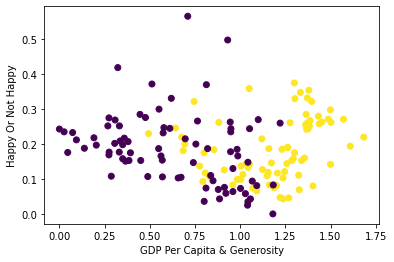

In [44]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("GDP Per Capita & Generosity")
plt.ylabel("Happy Or Not Happy")
plt.savefig("Images/logistics.png")

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [47]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [48]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.7692307692307693
Testing Data Score: 0.7948717948717948


In [49]:
# import numpy as np
# new_data = np.array([[-2, 6]])
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [50]:
# predictions = classifier.predict(X_test)
# pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [51]:
# Assign X (data) and y (target)
X = clean_2019.drop(["happy_nothappy","country"], axis=1)
y = clean_2019["happy_nothappy"]
print(X.shape, y.shape)

(156, 9) (156,)


In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [53]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [54]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [55]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


In [56]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['not_happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'not_happy'
 'happy' 'not_happy']
First 10 Actual labels: ['not_happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'not_happy', 'happy', 'not_happy']


In [57]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,not_happy,not_happy
1,happy,happy
2,happy,happy
3,happy,happy
4,happy,happy
5,happy,happy
6,happy,happy
7,not_happy,not_happy
8,happy,happy
9,not_happy,not_happy
